In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from matplotlib import style

In [4]:
data=pd.read_csv('/content/Sales.csv')

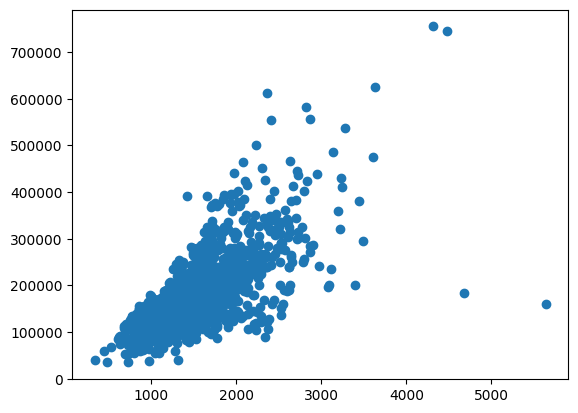

In [7]:
x=data['GrLivArea']
y=data['SalePrice']
plt.scatter(x,y)
plt.show()

In [10]:
x=data['GrLivArea']
y=data['SalePrice']
x=(x-x.mean())/x.std()
x=np.c_[np.ones(x.shape[0]),x]

In [19]:
aplha=0.01 #step-size
iterations=2000
m=y.size
np.random.seed(123)
theta=np.random.rand(2)

#Gradient descent
def gradient_descent(X,y,theta,iterations,alpha):
  past_costs=[]
  past_thetas=[theta] #theta is w0 and w1
  for i in range (iterations):
    prediction = np.dot(X,theta)
    error=prediction-y
    cost=(1/(2*m))*np.dot(error.T,error)
    past_costs.append(cost)
    theta=theta-(alpha*(1/m)*np.dot(X.T,error))
    past_thetas.append(theta)
  return past_thetas,past_costs

past_thetas,past_costs=gradient_descent(x,y,theta,iterations,aplha)
theta=past_thetas[-1]

#print the values
print("Gradient Descent: {:.2f},{:.2f}".format(theta[0],theta[1]))


Gradient Descent: 180921.20,56294.90


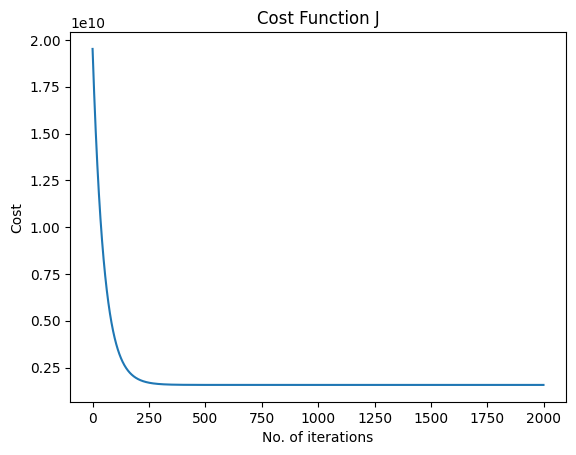

In [17]:
#plot the cost function
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [21]:
from __future__ import annotations
# animation
#set up the plot
fig=plt.figure()
ax=plt.axes()
plt.title('SalePrice vs GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.scatter(x[:,1],y , color='red')
line, =ax.plot([],[],lw=2)
annotation = ax.text(-1,700000,'')
annotation.set_animated(True)
plt.close()

#GEnerate the animation data

def init():
  line.set_data([],[])
  annotation.set_text('')
  return line,annotation

#anoimation function
def animate(i):
  x= np.linspace(-5,20,1000)
  y=past_thetas[i][1]*x+past_thetas[i][0]
  line.set_data(x,y)
  annotation.set_text('Cost = %.2f e10' %(past_costs[i]/10000000000))
  return line,annotation

anim=animation.FuncAnimation(fig,animate,init_func=init,
                             frames=2000,interval=0,blit=True)
anim.save('animation.gif',writer='imagemagick',fps=30)



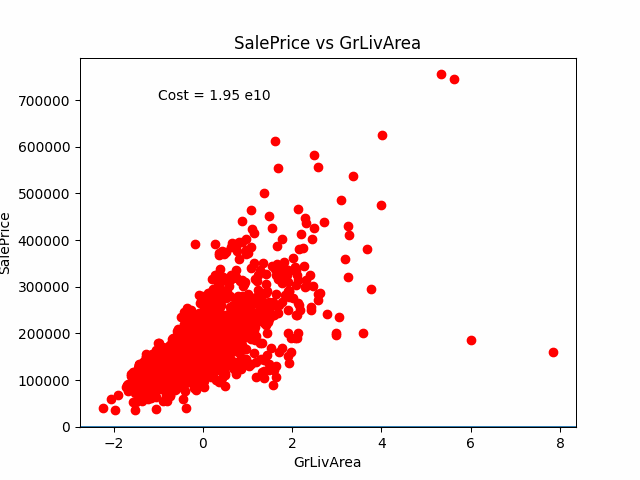

In [24]:
#display the animation
import io
import base64
from IPython.display import HTML

filename='animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))